In [2]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv('dataframe.csv')
df2

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,bc15_mean,bc15_median,bc15_std,bc16_mean,bc16_median,bc16_std,bc17_mean,bc17_median,bc17_std,month
0,2021-01-10,id_6094f75af85c5e001b870a52,rice_1y,0.720450,0.726511,0.025422,0.338732,0.342153,0.018440,4806.410884,...,11.469805,11.400586,0.556457,20.079914,20.146697,0.291681,0.190794,0.192612,0.015590,1
1,2021-01-05,id_60a09545f85c5e001b8714ba,rice_1y,0.050890,0.050000,0.006207,0.258570,0.259185,0.007349,5254.888889,...,4.993869,5.027701,0.180740,0.248578,0.248026,0.008103,0.040238,0.040382,0.005012,1
2,2021-01-10,id_60a098fbf85c5e001b8714db,rice_1y,0.385632,0.378166,0.042201,0.245925,0.251608,0.032063,969.441198,...,25.687715,26.136638,1.622138,31.874617,34.526121,9.549258,0.103870,0.101010,0.023376,1
3,2021-01-24,Name_5f2a51ce868954001c94d1f4,sugarcane,0.194315,0.182281,0.035539,10.616879,10.010155,1.769372,4565.833333,...,18.085678,17.032839,3.015635,12.857279,12.100346,2.226670,23.371643,21.679095,4.255678,1
4,2021-01-20,id_6094c0dcf85c5e001b870958,rice_1y,0.919154,0.926241,0.029616,0.437778,0.442913,0.021909,4875.832817,...,14.379265,14.247757,0.846592,33.579348,33.546590,2.318592,0.412541,0.428571,0.069055,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-07,id_6054a1b558a7cd00480009ec,sugarcane,0.672655,0.684995,0.080203,0.667675,0.168643,2.538696,5146.516068,...,16.362797,16.161983,1.355290,21.324231,21.379173,1.295597,2.695587,0.153897,9.564259,12
3308,2020-12-21,id_6094f75af85c5e001b870a52,rice_1y,0.824591,0.843045,0.047882,0.278297,0.285026,0.027774,3693.321088,...,15.699380,15.616999,1.306329,25.223561,25.387910,1.303736,0.355250,0.375192,0.059422,12
3309,2020-12-31,id_6094bc2cf85c5e001b870918,rice_1y,0.667244,0.667627,0.045040,0.258016,0.260745,0.018642,7020.150588,...,11.441567,11.302460,0.573300,17.309559,17.199143,0.675432,0.171341,0.172805,0.041752,12
3310,2020-12-20,id_6054a1b458a7cd0048000992,sugarcane,0.575426,0.624187,0.104442,0.342403,0.227568,1.265805,4721.607143,...,15.932437,15.624006,1.588508,21.902515,22.240792,2.786202,2.807577,0.112901,7.877306,12


In [70]:
data = pd.read_csv('dataframe2.csv')

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = df.sort_values(by=['date'])
data

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,b10_mean,b10_median,b10_std,b11_mean,b11_median,b11_std,b12_mean,b12_median,b12_std,month
1786,2020-07-03,Name_5f2a5324868954001c94d201,sugarcane,0.250802,0.253114,0.014855,0.264690,0.266351,0.011328,5063.663810,...,3772.030476,0.0,4485.894054,1154.457143,0.0,1374.713478,889.934286,0.0,1059.201426,7
2405,2020-07-03,id_6054a1b558a7cd00480009b9,sugarcane,0.045984,0.045692,0.003819,0.283422,0.283140,0.003703,15624.181818,...,1220.886364,1465.0,553.602447,2960.727273,3568.0,1342.194876,1716.125000,2068.0,777.945543,7
1801,2020-07-03,id_6054a1b458a7cd00480009a1,sugarcane,0.051992,0.051309,0.005102,0.253422,0.253802,0.004671,13752.631687,...,1098.549383,1389.0,570.094574,2770.154321,3507.0,1436.938595,1679.954733,2120.0,871.491294,7
3206,2020-07-03,id_6054a1b458a7cd004800099b,sugarcane,0.066951,0.065891,0.007054,0.271170,0.270490,0.004760,13180.242424,...,1030.560606,1233.0,473.999780,2625.348485,3186.0,1207.604328,1564.287879,1904.0,719.816281,7
2429,2020-07-03,id_6054a1b558a7cd00480009d7,sugarcane,0.076495,0.033484,0.462855,0.304458,0.304456,0.005560,12461.900000,...,3700.795238,1584.0,5064.699268,2230.102857,3527.0,1799.318805,1361.360000,2036.0,1110.769679,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,2021-06-30,id_6054a1b458a7cd004800099b,sugarcane,0.440827,0.461003,0.092351,0.126450,0.128659,0.044161,7713.303030,...,4947.174242,5949.0,2275.804771,2618.681818,3027.5,1227.776472,1947.916667,2265.0,934.167617,6
2485,2021-06-30,id_6054a1b558a7cd00480009d7,sugarcane,0.438477,0.449263,0.058814,3.513647,0.063961,4.848746,4479.320952,...,2181.831429,1514.0,2234.713163,1897.510476,2943.0,1535.442660,1295.976190,1925.0,1059.287537,6
2502,2021-06-30,id_6054a1b558a7cd00480009b9,sugarcane,0.513206,0.537832,0.083370,0.146012,0.155046,0.033941,6588.988636,...,4498.829545,5400.0,2040.409435,2211.022727,2648.5,1004.824589,1487.636364,1738.5,683.302828,6
2419,2021-06-30,id_6054a1b558a7cd00480009e9,sugarcane,0.399044,0.377174,0.086154,5.960522,0.183560,6.521667,4841.391667,...,1107.436905,1425.0,607.022327,1982.441667,2534.0,1088.129617,1396.050000,1770.0,768.990515,6


In [77]:
# sugarcane = data[data['target']=='sugarcane']
# rice = data[data['target']== 'rice_1y']
bands = data[['b1_std','b2_std','b3_std','b4_std','b5_std','b6_std','b7_std',\
             'b8_std','b9_std','b10_std','b11_std','b12_std','target','month','date']]

In [78]:
bands

,b1_std,b2_std,b3_std,b4_std,b5_std,b6_std,b7_std,b8_std,b9_std,b10_std,b11_std,b12_std,target,month,date
1786,1554.514502,1506.525219,1546.644529,1418.917105,1655.520094,2181.201701,2429.505140,2361.601949,2528.044338,4485.894054,1374.713478,1059.201426,sugarcane,7,2020-07-03
2405,2889.371541,2363.038361,2278.303399,2192.752847,2202.532075,2368.487895,2522.097909,2404.586299,2598.653024,553.602447,1342.194876,777.945543,sugarcane,7,2020-07-03
1801,2897.480991,2303.841264,2246.652133,2175.000162,2192.403930,2390.876369,2569.361481,2412.858280,2660.132436,570.094574,1436.938595,871.491294,sugarcane,7,2020-07-03
3206,2374.782237,1976.690216,1919.538570,1843.243856,1844.944441,2030.247137,2192.906720,2104.488407,2272.170621,473.999780,1207.604328,719.816281,sugarcane,7,2020-07-03
2429,4037.618193,3582.056578,3386.428831,3220.733942,3312.159668,3378.987445,3480.290642,3379.857389,3525.530923,5064.699268,1799.318805,1110.769679,sugarcane,7,2020-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,600.552471,633.029997,743.176493,694.939305,880.673645,1345.124762,1596.526891,1549.727602,1664.993913,2275.804771,1227.776472,934.167617,sugarcane,6,2021-06-30
2485,499.984020,550.781910,696.782925,628.992409,859.482981,1370.974574,1629.981434,1594.073074,1738.747155,2234.713163,1535.442660,1059.287537,sugarcane,6,2021-06-30
2502,386.131358,449.623240,544.179266,480.394001,645.960151,1149.651266,1412.461036,1355.630667,1467.185656,2040.409435,1004.824589,683.302828,sugarcane,6,2021-06-30
2419,369.543420,391.662252,492.312209,492.435781,599.802955,1001.034944,1247.770628,1221.132002,1301.622200,607.022327,1088.129617,768.990515,sugarcane,6,2021-06-30


In [79]:
sugarcane = bands[bands['target']=='sugarcane']
rice = bands[bands['target']== 'rice_1y']

In [80]:
sugarcane

,b1_std,b2_std,b3_std,b4_std,b5_std,b6_std,b7_std,b8_std,b9_std,b10_std,b11_std,b12_std,target,month,date
1786,1554.514502,1506.525219,1546.644529,1418.917105,1655.520094,2181.201701,2429.505140,2361.601949,2528.044338,4485.894054,1374.713478,1059.201426,sugarcane,7,2020-07-03
2405,2889.371541,2363.038361,2278.303399,2192.752847,2202.532075,2368.487895,2522.097909,2404.586299,2598.653024,553.602447,1342.194876,777.945543,sugarcane,7,2020-07-03
1801,2897.480991,2303.841264,2246.652133,2175.000162,2192.403930,2390.876369,2569.361481,2412.858280,2660.132436,570.094574,1436.938595,871.491294,sugarcane,7,2020-07-03
3206,2374.782237,1976.690216,1919.538570,1843.243856,1844.944441,2030.247137,2192.906720,2104.488407,2272.170621,473.999780,1207.604328,719.816281,sugarcane,7,2020-07-03
2429,4037.618193,3582.056578,3386.428831,3220.733942,3312.159668,3378.987445,3480.290642,3379.857389,3525.530923,5064.699268,1799.318805,1110.769679,sugarcane,7,2020-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,600.552471,633.029997,743.176493,694.939305,880.673645,1345.124762,1596.526891,1549.727602,1664.993913,2275.804771,1227.776472,934.167617,sugarcane,6,2021-06-30
2485,499.984020,550.781910,696.782925,628.992409,859.482981,1370.974574,1629.981434,1594.073074,1738.747155,2234.713163,1535.442660,1059.287537,sugarcane,6,2021-06-30
2502,386.131358,449.623240,544.179266,480.394001,645.960151,1149.651266,1412.461036,1355.630667,1467.185656,2040.409435,1004.824589,683.302828,sugarcane,6,2021-06-30
2419,369.543420,391.662252,492.312209,492.435781,599.802955,1001.034944,1247.770628,1221.132002,1301.622200,607.022327,1088.129617,768.990515,sugarcane,6,2021-06-30


In [ ]:
# plt.figure(figsize=(20,8))

# plt.subplot(2, 2, 1)
# sns.lineplot(x = "bands", y = "ndvi_mean", data = rice, palette = 'blue',label = 'ndvi_mean')
# sns.lineplot(x = "month", y = "ndvi_median", data = rice,palette = 'orange',label = 'ndvi_median')
# sns.lineplot(x = "month", y = "ndvi_std", data = rice,palette = 'green',label = 'ndvi_std')
# plt.title('Rice_ndvi')

In [76]:
sugarcane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 1786 to 2769
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   b1_std   1656 non-null   float64
 1   b2_std   1656 non-null   float64
 2   b3_std   1656 non-null   float64
 3   b4_std   1656 non-null   float64
 4   b5_std   1656 non-null   float64
 5   b6_std   1656 non-null   float64
 6   b7_std   1656 non-null   float64
 7   b8_std   1656 non-null   float64
 8   b9_std   1656 non-null   float64
 9   b10_std  1656 non-null   float64
 10  b11_std  1656 non-null   float64
 11  b12_std  1656 non-null   float64
 12  target   1656 non-null   object 
 13  month    1656 non-null   int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 194.1+ KB


Text(0.5, 1.0, 'band1_std')

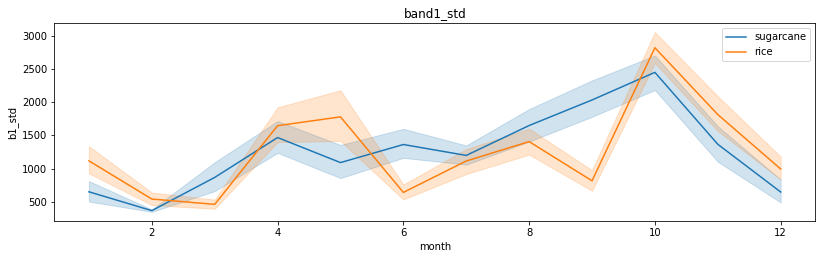

In [82]:
plt.figure(figsize=(30,8))
plt.subplot(2, 2, 1)
sns.lineplot(x = "month", y = "b1_std", data = sugarcane, palette = 'blue',label = 'sugarcane')
sns.lineplot(x = "month", y = "b1_std", data = rice, palette = 'orange',label = 'rice')
plt.title('band1_std')

Text(0.5, 1.0, 'band2_std')

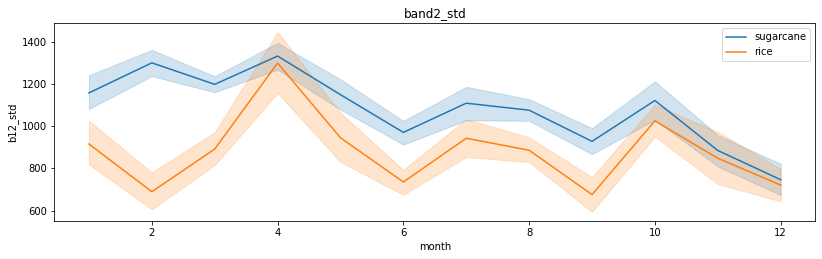

In [86]:
plt.figure(figsize=(30,8))
plt.subplot(2, 2, 1)
sns.lineplot(x = "month", y = "b12_std", data = sugarcane, palette = 'blue',label = 'sugarcane')
sns.lineplot(x = "month", y = "b12_std", data = rice, palette = 'orange',label = 'rice')
plt.title('band2_std')

In [49]:
bands2 = data[['b1_std','b2_std','b3_std','b4_std','b5_std','b6_std','b7_std',\
             'b8_std','b9_std','b10_std','b11_std','b12_std','target']]
sugarcane = bands2[bands2['target']=='sugarcane']
rice = bands2[bands2['target']== 'rice_1y']

In [92]:
sg = sugarcane.drop(columns =['target', 'month'])
sg

,b1_std,b2_std,b3_std,b4_std,b5_std,b6_std,b7_std,b8_std,b9_std,b10_std,b11_std,b12_std,date
1786,1554.514502,1506.525219,1546.644529,1418.917105,1655.520094,2181.201701,2429.505140,2361.601949,2528.044338,4485.894054,1374.713478,1059.201426,2020-07-03
2405,2889.371541,2363.038361,2278.303399,2192.752847,2202.532075,2368.487895,2522.097909,2404.586299,2598.653024,553.602447,1342.194876,777.945543,2020-07-03
1801,2897.480991,2303.841264,2246.652133,2175.000162,2192.403930,2390.876369,2569.361481,2412.858280,2660.132436,570.094574,1436.938595,871.491294,2020-07-03
3206,2374.782237,1976.690216,1919.538570,1843.243856,1844.944441,2030.247137,2192.906720,2104.488407,2272.170621,473.999780,1207.604328,719.816281,2020-07-03
2429,4037.618193,3582.056578,3386.428831,3220.733942,3312.159668,3378.987445,3480.290642,3379.857389,3525.530923,5064.699268,1799.318805,1110.769679,2020-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,600.552471,633.029997,743.176493,694.939305,880.673645,1345.124762,1596.526891,1549.727602,1664.993913,2275.804771,1227.776472,934.167617,2021-06-30
2485,499.984020,550.781910,696.782925,628.992409,859.482981,1370.974574,1629.981434,1594.073074,1738.747155,2234.713163,1535.442660,1059.287537,2021-06-30
2502,386.131358,449.623240,544.179266,480.394001,645.960151,1149.651266,1412.461036,1355.630667,1467.185656,2040.409435,1004.824589,683.302828,2021-06-30
2419,369.543420,391.662252,492.312209,492.435781,599.802955,1001.034944,1247.770628,1221.132002,1301.622200,607.022327,1088.129617,768.990515,2021-06-30


In [43]:
X = sugarcane.drop(columns = 'target')
X

,b1_std,b2_std,b3_std,b4_std,b5_std,b6_std,b7_std,b8_std,b9_std,b10_std,b11_std,b12_std
3,326.157353,413.137289,560.671014,753.556227,876.417727,969.576393,1062.422502,1092.636393,1158.474647,1148.209087,1739.000522,1707.714406
5,280.159489,388.384112,533.500820,806.828174,870.652804,1100.046095,1265.070154,1264.768190,1403.853100,1345.896405,1521.550898,1108.323972
6,276.033796,333.283000,492.400758,451.166442,708.019179,1279.116104,1487.205454,1554.888521,1623.211570,1609.770766,1142.038405,656.403780
9,143.110852,230.676385,436.838355,274.942371,580.690960,1519.264680,1852.438785,1833.914570,1981.697761,1919.149873,1000.367118,484.661075
12,252.615228,321.112203,419.505031,424.709537,599.684345,938.874598,1085.507070,1125.318802,1197.742372,1178.573013,947.777709,583.569760
...,...,...,...,...,...,...,...,...,...,...,...,...
3303,1952.618824,1964.303548,1855.535815,1750.405140,1846.277299,1815.779213,1834.686359,1816.971666,1810.747332,2548.844367,1512.751848,1228.286550
3305,218.432002,322.327698,447.580759,425.898186,632.121271,1073.287726,1261.771455,1258.805836,1381.282356,1728.582076,974.386800,603.934991
3307,150.208433,160.557385,303.197614,260.061347,458.818368,1037.672789,1228.721564,1236.849677,1311.852769,1296.599251,888.445474,508.977738
3310,253.755990,323.397020,445.340482,422.698759,577.514005,1099.017686,1303.436033,1341.890210,1403.113228,1332.665346,908.640905,562.163483


<AxesSubplot:>

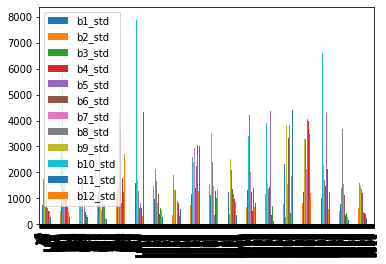

In [47]:
X.groupby

In [42]:
sns.lineplot(X)

/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

In [18]:
df3 = pd.read_csv('dataframe3.csv')
df3[df3.file_id == 'id_60628e67f85c5e001b86ec15'].drop_duplicates().sort_values(by=['date'])

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,b10_mean,b10_median,b10_std,b11_mean,b11_median,b11_std,b12_mean,b12_median,b12_std,month
176,1/21/2021,id_60628e67f85c5e001b86ec15,sugarcane,0.372505,0.390667,0.091801,0.628778,0.176061,2.977893,4546.066986,...,2846.550239,3136.0,932.232931,1409.576555,1533.0,475.474741,1066.188995,1139.0,369.008435,1
651,3/7/2021,id_60628e67f85c5e001b86ec15,sugarcane,1.010959,0.357081,4.061638,5.700885,0.222978,10.735166,3726.141148,...,1644.011962,1698.0,727.375335,1246.767943,910.0,870.880969,982.220096,624.0,773.163104,3
967,4/11/2021,id_60628e67f85c5e001b86ec15,sugarcane,0.174739,0.177764,0.038991,0.130037,0.136686,0.029831,7357.538278,...,8081.349282,8891.0,2632.824577,2100.535885,2312.0,687.232130,1785.198565,1953.0,589.898038,4
997,4/21/2021,id_60628e67f85c5e001b86ec15,sugarcane,4.714353,0.402158,10.629453,4.843213,0.340819,11.492473,3001.789474,...,2337.133971,1327.0,2277.077939,721.000000,413.0,629.043182,622.937799,277.0,663.315354,4
1646,7/25/2020,id_60628e67f85c5e001b86ec15,sugarcane,2.232372,0.030319,3.436890,3.159646,0.040297,3.793520,11408.665070,...,9492.110048,10896.0,3511.982562,3788.119617,4177.0,1275.963256,3749.677033,4185.0,1303.675916,7
1788,7/30/2020,id_60628e67f85c5e001b86ec15,sugarcane,0.608612,0.667009,0.166382,1.434134,0.241818,4.727942,5361.772727,...,3080.275120,3428.0,1017.614653,1594.476077,1728.0,542.247790,1074.212919,1115.0,396.780766,7
1645,7/5/2020,id_60628e67f85c5e001b86ec15,sugarcane,0.244532,0.248945,0.042012,0.115904,0.083741,0.690146,6224.885167,...,4288.425837,4751.0,1430.158376,2043.188995,2267.0,670.748065,1609.490431,1773.5,532.714059,7
1984,8/4/2020,id_60628e67f85c5e001b86ec15,sugarcane,1.126219,0.009521,2.193278,0.350529,0.349494,0.008586,16477.459330,...,14146.966510,15644.0,4602.008549,2646.528708,2918.0,862.302124,2751.983254,3043.0,896.913083,8
2260,9/18/2020,id_60628e67f85c5e001b86ec15,sugarcane,0.023244,0.023144,0.001895,0.639610,0.639480,0.001698,21771.114830,...,4860.119617,5373.0,1581.049261,1684.720096,1862.0,548.130944,1969.442584,2178.0,640.731141,9


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3312 non-null   object 
 1   file_id      3312 non-null   object 
 2   target       3312 non-null   object 
 3   ndvi_mean    3312 non-null   float64
 4   ndvi_median  3312 non-null   float64
 5   ndvi_std     3312 non-null   float64
 6   mi_mean      3312 non-null   float64
 7   mi_median    3312 non-null   float64
 8   mi_std       3312 non-null   float64
 9   bc1_mean     3312 non-null   float64
 10  bc1_median   3312 non-null   float64
 11  bc1_std      3312 non-null   float64
 12  bc2_mean     3312 non-null   float64
 13  bc2_median   3312 non-null   float64
 14  bc2_std      3312 non-null   float64
 15  bc3_mean     3312 non-null   float64
 16  bc3_median   3312 non-null   float64
 17  bc3_std      3312 non-null   float64
 18  bc4_mean     3312 non-null   float64
 19  bc4_me

In [17]:
df4 = pd.read_csv('dataframe2.csv')
df4[df4.file_id == 'id_60628e67f85c5e001b86ec15'].drop_duplicates().sort_values(by=['date'])

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,b10_mean,b10_median,b10_std,b11_mean,b11_median,b11_std,b12_mean,b12_median,b12_std,month
1770,2020-07-20,id_60628e67f85c5e001b86ec15,sugarcane,0.167303,0.173443,0.043744,0.141908,0.147441,0.032529,6508.356459,...,659.021531,726.0,215.345582,1843.782297,1967.0,630.056030,1346.160287,1442.5,462.756496,7
1699,2020-07-25,id_60628e67f85c5e001b86ec15,sugarcane,2.232372,0.030319,3.436890,3.159646,0.040297,3.793520,11408.665072,...,9492.110048,10896.0,3511.982562,3788.119617,4177.0,1275.963256,3749.677033,4185.0,1303.675916,7
1694,2020-07-30,id_60628e67f85c5e001b86ec15,sugarcane,0.608612,0.667009,0.166382,1.434134,0.241818,4.727942,5361.772727,...,3080.275120,3428.0,1017.614653,1594.476077,1728.0,542.247790,1074.212919,1115.0,396.780766,7
2143,2020-08-29,id_60628e67f85c5e001b86ec15,sugarcane,0.663861,0.730089,0.176981,1.397444,0.232662,4.519495,5611.394737,...,2801.040670,3084.0,966.091787,1763.873206,1891.0,611.303064,1149.545455,1176.0,451.659565,8
2405,2020-09-08,id_60628e67f85c5e001b86ec15,sugarcane,0.096361,0.095168,0.011094,0.278830,0.278351,0.008748,8781.260766,...,14354.916268,15874.0,4669.654615,1805.241627,1983.0,588.109542,1761.631579,1948.0,573.485564,9
2393,2020-09-18,id_60628e67f85c5e001b86ec15,sugarcane,0.023244,0.023144,0.001895,0.639610,0.639480,0.001698,21771.114833,...,4860.119617,5373.0,1581.049261,1684.720096,1862.0,548.130944,1969.442584,2178.0,640.731141,9
2246,2020-09-23,id_60628e67f85c5e001b86ec15,sugarcane,0.163393,0.166882,0.028696,0.179707,0.183321,0.020480,7632.234450,...,937.057416,1032.0,305.121713,2004.638756,2212.0,653.615360,1512.870813,1663.0,493.935022,9
2726,2020-10-03,id_60628e67f85c5e001b86ec15,sugarcane,3.959483,3.953307,0.035893,0.314853,0.314613,0.010183,22438.440191,...,14356.765550,15876.0,4670.256183,3769.162679,4130.0,1228.846356,3500.904306,3825.0,1144.940405,10
2472,2020-10-13,id_60628e67f85c5e001b86ec15,sugarcane,4.086455,4.086728,0.011358,0.344949,0.344820,0.002004,21464.789474,...,1739.607656,1912.0,566.648937,3504.055024,3869.0,1140.018305,2170.727273,2398.0,706.444258,10
2638,2020-10-28,id_60628e67f85c5e001b86ec15,sugarcane,0.012790,0.012464,0.005090,0.345600,0.345391,0.004162,11464.935407,...,14276.282297,15787.0,4644.074978,1860.239234,2054.0,605.265769,2039.858852,2254.0,663.723787,10


In [10]:
df4.file_id.value_counts()

id_60a09545f85c5e001b8714ba      72
id_6094ba1df85c5e001b8708f8      72
id_60a0988df85c5e001b8714d9      72
id_609debfcf85c5e001b87122b      72
id_609dd39af85c5e001b8711bf      72
                                 ..
Name_5f2a4f34868954001c94d1da    26
id_6054a1b558a7cd00480009e6      26
id_6054a1b558a7cd00480009b0      25
id_6054a1b558a7cd00480009dd      25
id_6054a1b458a7cd004800098c      25
Name: file_id, Length: 66, dtype: int64

In [12]:
df3.file_id.value_counts()

Name_5f2a51ce868954001c94d1f4    146
Name_5f2a5324868954001c94d201    146
Name_5f2a4ff3868954001c94d1e6    144
Name_5f2a4ef2868954001c94d1d5     96
Name_5f2a4f86868954001c94d1e0     95
                                ... 
id_6054a1b558a7cd00480009d4       18
id_6054a1b458a7cd00480009a4       18
id_6054a1b558a7cd00480009d7       18
id_6054a1b558a7cd00480009ec       13
id_60628e67f85c5e001b86ec15        9
Name: file_id, Length: 66, dtype: int64